In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def read_file(image_path):
    image_path = cv2.imread(image_path)
    image_path = cv2.cvtColor(image_path , cv2.COLOR_BGR2RGB)
    plt.imshow(image_path)
    plt.title('Original Image')
    plt.axis("off")
    plt.show()
    return image_path

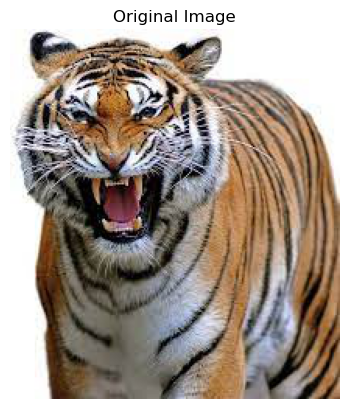

In [13]:
image_path = "/Users/mohammedthansheer/Desktop/Cartoon/images/tiger.jpg"
image_path = read_file(image_path)


In [14]:
#Create Edge mask
def edge_mask(image_path , line_size, blur_value):
    gray = cv2.cvtColor(image_path, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, line_size, blur_value)
    
    return edges
    

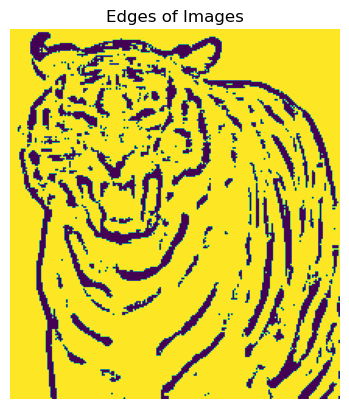

In [15]:
line_size, blur_value=7,7
edges = edge_mask(image_path, line_size, blur_value)
plt.imshow(edges)
plt.title('Edges of Images')
plt.axis("off")
plt.show()

In [16]:
#Reduce the colour plate
def color_quantization(img , k):
    
    #transforming the image
    data = np.float32(img).reshape((-1,4))

    # Determine the critria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

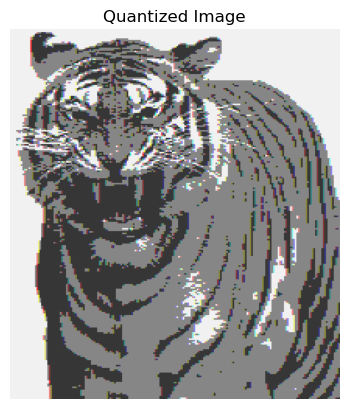

In [17]:
img_quantiz = color_quantization(image_path , k=3)
plt.imshow(img_quantiz)
plt.title('Quantized Image')
plt.axis("off")
plt.show()

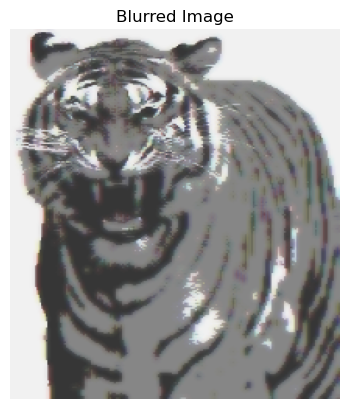

In [18]:
#Reduce the noise in image
blurred = cv2.bilateralFilter(img_quantiz, d=7, sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.title('Blurred Image')
plt.axis("off")
plt.show()

In [19]:
#Combine Edge Mask and with quantiz img
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask = edges)

    plt.imshow(c)
    plt.title('Cartoonified Image')
    plt.axis("off")
    plt.imsave
    plt.show()

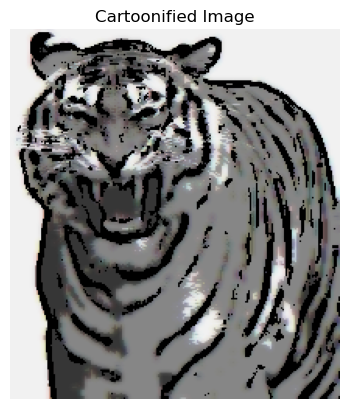

In [20]:
cartoon()